In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.width', 10000)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score

In [2]:
original_df = pd.read_csv('dataset_2277.csv')
original_df.dropna(inplace=True)

In [3]:
def analysis_prediction_stats(df):
    TP = len(df[(df['won_predict'] == 1) & (df['won'] == 1)])
    TN = len(df[(df['won_predict'] == 0) & (df['won'] == 0)])
    FP = len(df[(df['won_predict'] == 1) & (df['won'] == 0)])
    FN = len(df[(df['won_predict'] == 0) & (df['won'] == 1)])

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return {
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN,
        'N': TP + TN + FP + FN,
        'accuracy': accuracy
    }

In [4]:
def make_stats_list(df):
    stats_list = []

    for player_name in df['player_name'].unique():
        player_df = df[df['player_name'] == player_name].copy()

        player_info = {
            'Name': player_name,
            'Current Rating': player_df['player_elo'].iloc[0],
            'Average Rating': round(np.mean(player_df['player_elo']))
        }

        player_info.update(analysis_prediction_stats(player_df))

        stats_list.append(player_info)

    return stats_list

In [21]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = original_df.copy()

X = df[['elo_diff', 'x-ma20', 'x-ma5', 'opp_x-ma20', 'opp_x-ma5']]
y = df['won']

kf = KFold(n_splits=5, random_state=42, shuffle=True)

accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    df.loc[df.index[test_index], 'won_predict'] = predictions
    
    test_acc = accuracy_score(y_test, predictions)
    accuracies.append(test_acc)

mean_test_acc = sum(accuracies) / len(accuracies)
print("MEAN TEST ACCURACY:", mean_test_acc)

df['won_predict'] = df['won_predict'].astype(int)
df['correct'] = df['won'] == df['won_predict']
print(df.head(20))

MEAN TEST ACCURACY: 0.5153054255301428
    player_name              opp_name  player_elo  opp_elo  elo_diff  color  x-ma5  x-ma20  opp_x-ma5  opp_x-ma20  won  won_predict  correct
19  BIG_TONKA_T               MedNef0        1453     1427        26   True    2.4   -6.65        7.0       -7.30    0            1    False
20  BIG_TONKA_T              Huss855c        1444     1442         2  False   -4.6    7.35       15.4       72.95    0            1    False
21  BIG_TONKA_T          waleedtahir6        1436     1386        50  False  -10.4  -49.60       -3.4      -25.75    1            1     True
22  BIG_TONKA_T               JHH1953        1443     1415        28   True   -1.2  -22.25        4.8        5.40    0            0     True
23  BIG_TONKA_T                 Al045        1434     1532       -98   True   -8.0   94.00       -4.8        5.30    0            0     True
24  BIG_TONKA_T            itobandito        1428     1403        25  False   -9.0  -35.75        1.6       17.35  

In [22]:
stats_df = pd.DataFrame(make_stats_list(df))

overall_average_accuracy = np.sum(stats_df['accuracy'] * stats_df['N']) / np.sum(stats_df['N'])
print('overall average accuracy', round(overall_average_accuracy, 5))
print('number of games analyzed:', np.sum(stats_df['N']))

stats_df

overall average accuracy 0.51529
number of games analyzed: 1733


,Name,Current Rating,Average Rating,TP,TN,FP,FN,N,accuracy
0,BIG_TONKA_T,1453,1452,23,14,21,18,76,0.486842
1,Andymcg12345,1514,1509,19,25,18,18,80,0.550000
2,alfmi1971,1464,1469,21,23,18,14,76,0.578947
3,majidsafavi,1455,1511,15,13,22,28,78,0.358974
4,riozawazz,1439,1449,17,30,16,15,78,0.602564
5,KINGBONECRUSHER,1429,1476,12,7,10,7,36,0.527778
6,TDVN,1596,1483,12,25,25,16,78,0.474359
7,KingGreg46,1504,1503,18,17,24,19,78,0.448718
8,Lucienslight,1564,1527,21,15,25,17,78,0.461538
9,tsavage88,1462,1471,11,14,7,11,43,0.581395


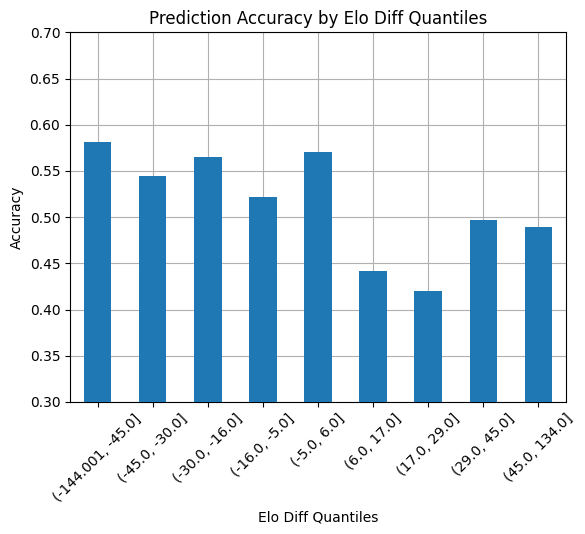

In [23]:
# accuracy by elo difference quantile
num_quantiles = 9
df['quantile'] = pd.qcut(df['elo_diff'], q=num_quantiles)
grouped = df.groupby('quantile', observed=False)['correct'].mean()
grouped.plot(kind='bar', zorder=3)

plt.xlabel('Elo Diff Quantiles')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Prediction Accuracy by Elo Diff Quantiles')
plt.grid(zorder=2)
plt.ylim(0.3, 0.7)

# Show the plot
plt.show()